## Read and process data

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('/Users/akshitbhatia/Downloads/prediction-task/data/data_train.csv')
weather = pd.read_csv('/Users/akshitbhatia/Downloads/prediction-task/data/weather.csv')
display(data.head())
print('weather data')
weather.head()


,date,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,school_holiday,feature_8,feature_9,feature_10,label
0,2005-03-20,0,0,0,0,3.2,6.7,1.7,3.7,0,0,0,0,0,915
1,2005-03-21,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1057
2,2005-03-22,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1482
3,2005-03-23,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1883
4,2005-03-24,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1790


weather data


,date,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
0,2005-03-20,69.0,8.9,4.4,0.2,0.0,0,11.1,7.6
1,2005-03-21,58.0,13.2,6.2,-0.3,0.0,0,11.3,9.7
2,2005-03-22,52.0,18.0,10.6,3.0,3.3,0,8.6,9.2
3,2005-03-23,79.0,17.6,12.5,7.2,0.0,0,8.4,8.2
4,2005-03-24,71.0,20.1,13.3,6.4,4.3,0,7.9,8.6


In [3]:
# Merge datasets on the date column
data = pd.merge(data, weather, on='date', how='left')

# Drop the date column if not useful
data = data.drop(columns=['date'])
data

,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,school_holiday,...,feature_10,label,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
0,0,0,0,0,3.2,6.7,1.7,3.7,0,0,...,0,915,69.0,8.9,4.4,0.2,0.0,0,11.1,7.6
1,0,0,0,0,3.2,6.7,1.7,3.7,0,3,...,0,1057,58.0,13.2,6.2,-0.3,0.0,0,11.3,9.7
2,0,0,0,0,3.2,6.7,1.7,3.7,0,3,...,0,1482,52.0,18.0,10.6,3.0,3.3,0,8.6,9.2
3,0,0,0,0,3.2,6.7,1.7,3.7,0,3,...,0,1883,79.0,17.6,12.5,7.2,0.0,0,8.4,8.2
4,0,0,0,0,3.2,6.7,1.7,3.7,0,3,...,0,1790,71.0,20.1,13.3,6.4,4.3,0,7.9,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,0,0,0,0,4.6,7.6,2.6,4.6,0,3,...,0,1524,82.0,4.8,3.3,2.3,3.5,0,0.0,11.8
1739,0,0,0,0,4.6,7.6,2.6,4.6,0,3,...,0,1542,91.0,5.2,2.1,-2.9,0.2,0,2.1,13.5
1740,0,0,0,0,4.6,7.6,2.6,4.6,0,3,...,0,1922,95.0,0.8,-0.6,-2.6,4.6,0,1.2,8.5
1741,0,0,0,0,4.6,7.6,2.6,4.6,0,3,...,0,1576,95.0,0.1,-0.2,-0.8,10.7,3,0.0,8.7


In [4]:
# Define features and target
X = data.drop(columns=['label'])
y = data['label']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-0.16139079, -0.26271354, -0.24179787, ..., -0.12691394,
         0.547632  ,  0.54702199],
       [-0.16139079,  3.80642731, -0.24179787, ..., -0.12691394,
         1.22131467, -0.46599194],
       [-0.16139079, -0.26271354, -0.24179787, ..., -0.12691394,
        -0.75327245, -1.12308206],
       ...,
       [-0.16139079, -0.26271354, -0.24179787, ..., -0.12691394,
        -0.19574197, -0.87667327],
       [-0.16139079, -0.26271354, -0.24179787, ..., -0.12691394,
        -0.5906594 , -0.13744688],
       [-0.16139079, -0.26271354, -0.24179787, ..., -0.12691394,
         0.50117113,  0.46488573]])

## Machine Learning Models: GradientBoosting algorithm beats RandomForest

### Random Forest

In [19]:
# Model Training and Prediction
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Feature Importance Analysis

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

Root Mean Squared Error (RMSE): 479.80

Feature Importances:
                       Feature  Importance
9               school_holiday    0.265029
14   air_temperature_daily_max    0.171582
16   air_temperature_daily_min    0.098664
20              wind_speed_max    0.090775
15  air_temperature_daily_mean    0.075906
13                air_humidity    0.068986
19              sunshine_hours    0.064628
17               precipitation    0.050772
1                    feature_0    0.043973
2                    feature_1    0.013980
0                 bank_holiday    0.009780
5                    feature_4    0.007337
7                    feature_6    0.007198
6                    feature_5    0.007058
4                    feature_3    0.006737
12                  feature_10    0.005615
3                    feature_2    0.004779
8                    feature_7    0.003687
18                 snow_height    0.003513
11                   feature_9    0.000000
10                   feature_8    0.

### Gradient Boosting Model

In [20]:
# Handle Nans

imputer = SimpleImputer(strategy='mean')  # You can choose 'median', 'most_frequent', etc.
X_train = imputer.fit_transform(X_train_scaled)
X_test = imputer.transform(X_test_scaled)

# Gradient Boosting Model Training and Prediction
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f'Gradient Boosting RMSE: {rmse_gb:.2f}')

# Feature Importance Analysis
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

Gradient Boosting RMSE: 454.79

Feature Importances:
                       Feature  Importance
9               school_holiday    0.422398
14   air_temperature_daily_max    0.199466
1                    feature_0    0.066075
19              sunshine_hours    0.047346
16   air_temperature_daily_min    0.046622
15  air_temperature_daily_mean    0.041005
20              wind_speed_max    0.035253
13                air_humidity    0.029136
2                    feature_1    0.028640
17               precipitation    0.022224
12                  feature_10    0.012680
0                 bank_holiday    0.011032
7                    feature_6    0.008324
8                    feature_7    0.007351
3                    feature_2    0.006886
6                    feature_5    0.005721
18                 snow_height    0.004346
4                    feature_3    0.003265
5                    feature_4    0.002229
11                   feature_9    0.000000
10                   feature_8    0.000000


## Visualisation

### Plot from random forest

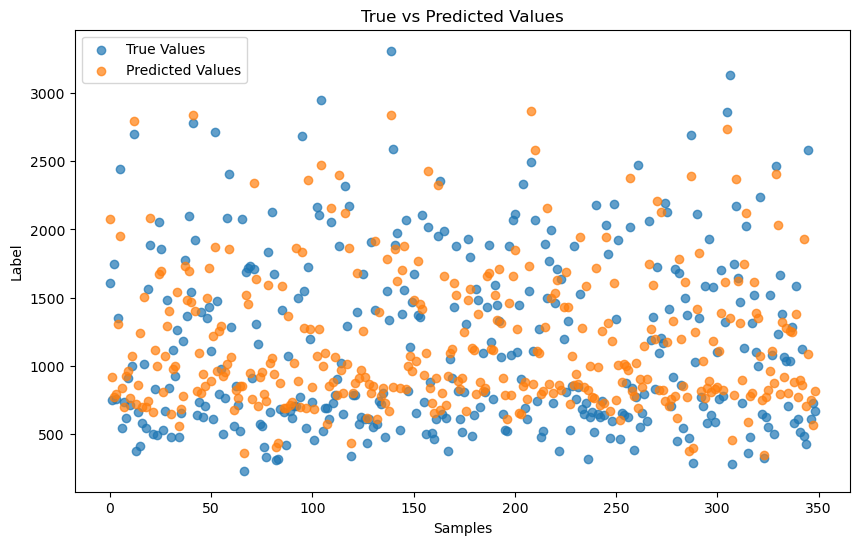

In [18]:
import matplotlib.pyplot as plt
# Visualization of Predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='True Values', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', alpha=0.7)
plt.legend()
plt.title('True vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Label')
plt.show()

### Plot from gradient boosting algorithm

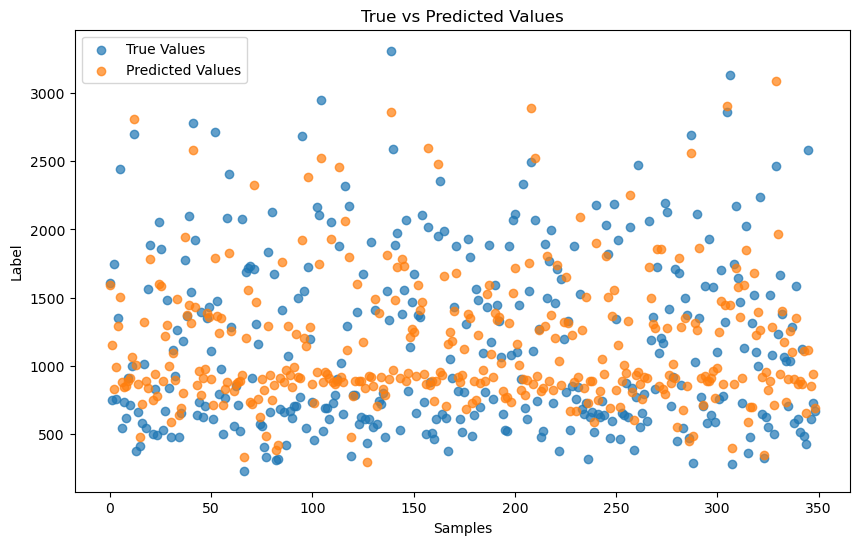

In [21]:
import matplotlib.pyplot as plt
# Visualization of Predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='True Values', alpha=0.7)
plt.scatter(range(len(y_pred_gb)), y_pred_gb, label='Predicted Values', alpha=0.7)
plt.legend()
plt.title('True vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Label')
plt.show()